In [1]:
%matplotlib inline

## 4.2 Linear Regression of an Indicator Matrix

Set $Y$ as an indicator response matrix via the one-hot encode.

If $\mathcal{G}$ has $K$ classes and there are $N$ obersations $Y$ is a $N \times K$ matrix.
For e.g. $Y=\left\{cat,dog,cat,cow\right\}$ then 

$Y=\left(\begin{matrix}1&0&0\\0&1&0\\1&0&0\\0&0&1\\\end{matrix}\right)$

### Model

The coefficients are in the matrix $(p+1,K)$ such as we have a coefficient vector for each class. 
$$Y_{\left(N,K\right)}=X_{\left(N,p+1\right)}B_{\left(p+1,K\right)}$$

### Fit

In a similar way than the multiple linear regression the coefficients obtain with OLS are equal to,
$$\hat{B}=\left(X^TX\right)^{-1}X^TY$$
Then,
$$\hat{Y}=X\left(X^TX\right)^{-1}X^TY$$

### Prediction

- Compute the fitted output:
$$\hat{f}\left(x\right)_{\left(1,K\right)}^T=\left(1,x^T\right)_{\left(1,p+1\right)}{\hat{B}}_{\left(p+1,K\right)}$$
With $\hat{f}\left(x\right)_{\left(1,K\right)}^T=\left(\begin{matrix}{\hat{f}}_1\left(x\right)&{\hat{f}}_2\left(x\right)&\ldots&{\hat{f}}_K\left(x\right)\\\end{matrix}\right)$

- Identify the largest component and classify accordingly:
$$\hat{G}\left(x\right)=\underset{k\in\mathcal{G}}{argmax}{\hat{f}}_k\left(x\right) \tag{4.4}$$

### Rationale of this approach

The regression is an estimate of conditional expectation such that in the classification framework, $P(Y_k|X=x)=E(Y_k|X=x)$.

Properties:
- $\sum_{k\in\mathcal{G}}{{\hat{f}}_k\left(x\right)}=1$
- ${\hat{f}}_k\left(x\right)$ could be less than 0 or greater than 1, this violation doesn't imply that this approach will not work

If we allow linear regression onto basis expansions $h(X)$ of the inputs, this approach can lead to consistent estimates of the probabilities (Chapter 5).



### Simplistic viewpoint

$t_k$ is a $k$th column of the target indentity matrix $(K \times K)$ with the response vector $y_i$ the $i$th row of the observation $i$ which has the value $y_i=t_k$ if $g_i=k$.

We could fit the linear model by least squares. The criterion is a sum-of-squared Euclidean distances of the fitted vectors from their targets.
$$\hat{B}=\underset{B}{argmin}{\sum_{i=1}^{N}{\lVert y_i-\left[\left(1,x_i^T\right)B\right]^T \rVert _{2}^2}} \tag {4.5}$$
Inside the $L2$ norm squared we have then a $(1 \times K)$ matrix such that,

$\left(y_i\right)_{(1 \times K)}-\left[\left(1,x_i^T\right)_{\left(1 \times p+1\right)}B_{\left(p+1 \times K\right)}\right]_{(1 \times K)}^T$

Then the new observation is classified by computing its fitted vector $\hat{f}(x)$ and by classifying to the closest target (equivalent to the method used in $(4.4)$):
$$\hat{G}\left(x\right)=\underset{k}{argmin}{\lVert \hat{f}\left(x\right)-t_k \rVert_{2}^2} \tag {4.6}$$

### Issue with regression approach: masked class

When the number of classes is greater than 3, classes can be masked by others.

#### Extrem case: linear regression 3 "line up" classes

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

##### Data

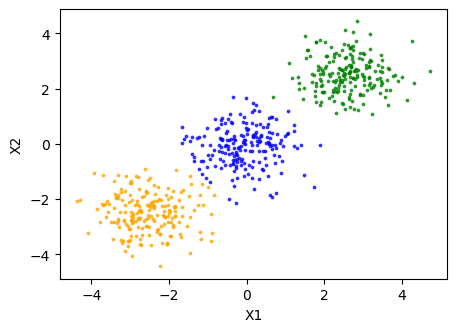

In [3]:
# Plot data

centers = [(-2.5, -2.5), (0, 0), (2.5, 2.5)]
X, y = make_blobs(n_samples=600, n_features=2, cluster_std=0.7,
                  centers=centers, random_state=0)

fig, ax = plt.subplots(1, figsize=(5, 3.5))

X_C0 = X[y==0, :]
X_C1 = X[y==1, :]
X_C2 = X[y==2, :]

ax.scatter(X_C0[:, 0], X_C0[:, 1], s=3, color="orange", alpha=0.7)
ax.scatter(X_C1[:, 0], X_C1[:, 1], s=3, color="blue", alpha=0.7)
ax.scatter(X_C2[:, 0], X_C2[:, 1], s=3, color="green", alpha=0.7)

ax.set_xlabel("X1")
ax.set_ylabel("X2")

plt.show()

In [4]:
from sklearn.preprocessing import OneHotEncoder

In [5]:
# convert y to indicator matrix
enc = OneHotEncoder() 
y_one_hot = enc.fit_transform(y.reshape(-1,1)).toarray()

##### Fit

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [7]:
reg_linear = LinearRegression(fit_intercept=True).fit(X, y_one_hot)

##### Grid predictions

In [8]:
def y_pred_to_binary(row):
    return (row == row.max(axis=1)[:,None]).astype(int)

In [9]:
y_pred = reg_linear.predict(X)
y_pred =  y_pred_to_binary(y_pred)

In [10]:
x1_min = np.min(X[:, 0])
x1_max = np.max(X[:, 0])
x2_min = np.min(X[:, 1])
x2_max = np.max(X[:, 1])

nb_point_ax = 70

X_grid = np.array([[i,j]
                   for i in np.linspace(x1_min, x1_max, nb_point_ax)
                   for j in np.linspace(x2_min, x2_max, nb_point_ax)]
                 )

y_pred_grid = reg_linear.predict(X_grid)

y_pred_grid = y_pred_to_binary(y_pred_grid)

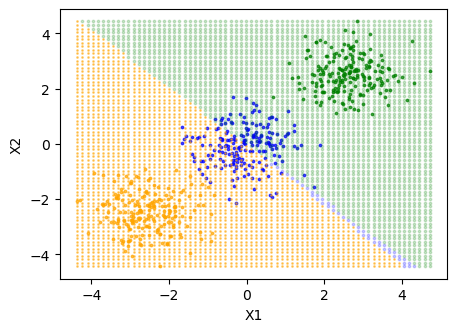

In [11]:
fig, ax = plt.subplots(1, figsize=(5, 3.5))

# Data plot
X_C0 = X[y==0, :]
X_C1 = X[y==1, :]
X_C2 = X[y==2, :]

ax.scatter(X_C0[:, 0], X_C0[:, 1], s=3, color="orange", alpha=0.7)
ax.scatter(X_C1[:, 0], X_C1[:, 1], s=3, color="blue", alpha=0.7)
ax.scatter(X_C2[:, 0], X_C2[:, 1], s=3, color="green", alpha=0.7)

# Grid prediction plot
X_grid_C0 = X_grid[y_pred_grid[:, 0]==1, :]
X_grid_C1 = X_grid[y_pred_grid[:, 1]==1, :]
X_grid_C2 = X_grid[y_pred_grid[:, 2]==1, :]

ax.scatter(X_grid_C0[:, 0], X_grid_C0[:, 1], s=1, color="orange", alpha=0.5)
ax.scatter(X_grid_C1[:, 0], X_grid_C1[:, 1], s=3, color="blue", alpha=0.2)
ax.scatter(X_grid_C2[:, 0], X_grid_C2[:, 1], s=3, color="green", alpha=0.2)

ax.set_xlabel("X1")
ax.set_ylabel("X2")

plt.show()


Almost all the space is determined by class 1 and 3.

##### Train predictions 

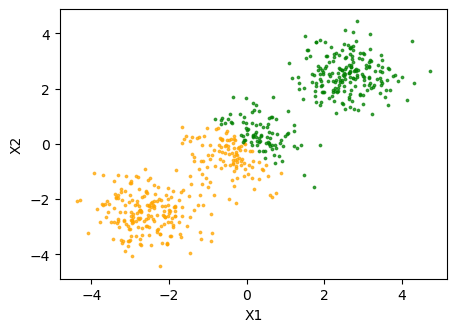

In [12]:
fig, ax = plt.subplots(1, figsize=(5, 3.5))

# Data plot
X_pred_C0 = X[y_pred[:, 0]==1, :]
X_pred_C1 = X[y_pred[:, 1]==1, :]
X_pred_C2 = X[y_pred[:, 2]==1, :]

ax.scatter(X_pred_C0[:, 0], X_pred_C0[:, 1], s=3, color="orange", alpha=0.7)
ax.scatter(X_pred_C1[:, 0], X_pred_C1[:, 1], s=3, color="blue", alpha=0.7)
ax.scatter(X_pred_C2[:, 0], X_pred_C2[:, 1], s=3, color="green", alpha=0.7)

ax.set_xlabel("X1")
ax.set_ylabel("X2")

plt.show()

Observations from class 2 are classified either as class 1 or class 3.

#### More realistic case: vowel data

 However, in case of small $p$ and large $K$ this phenomena naturally occurs.

##### Data

In [13]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [14]:
# Load data
data = pd.read_csv("../../data/vowel.csv", sep=";")

# Prepare data
train_bool = "is_train"
target = "y"

# Shift by -1 all the classes to simplify the use of argmax function
# or alternatively shift by +1 the predicted classes.
data[target] = data[target] - 1

data_train = data[data[train_bool] == 1]
data_test = data[data[train_bool] == 0]

features = list(data_train.columns)
features.remove(target)
features.remove(train_bool)

X_train = data_train[features].values
X_test = data_test[features].values

y_train = data_train[target].values
y_test = data_test[target].values

enc = OneHotEncoder()
y_train_one = enc.fit_transform(y_train.reshape(-1,1)).toarray()

##### Fit, prediction and errors

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train_one)

y_train_pred = np.argmax(reg_linear.predict(X_train), axis=1)
y_test_pred = np.argmax(reg_linear.predict(X_test), axis=1)

train_error = 1 - accuracy_score(y_train, y_train_pred)
test_error = 1 - accuracy_score(y_test, y_test_pred)

print(f"The training error rate is {train_error:.2f} "
      f"and the test error rate is {test_error:.2f}")

The training error rate is 0.48 and the test error rate is 0.67


##### Improvement with polynomial features ?

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
degree = list(range(2,11))
train_error_poly = []
test_error_poly = []

for d in degree:
    poly = PolynomialFeatures(d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)

    reg_poly = LinearRegression()
    reg_poly.fit(X_train_poly, y_train_one)

    y_train_pred_poly = np.argmax(reg_poly.predict(X_train_poly), axis=1)
    y_test_pred_poly = np.argmax(reg_poly.predict(X_test_poly), axis=1)

    train_error_poly = 1 - accuracy_score(y_train, y_train_pred_poly)
    test_error_poly = 1 - accuracy_score(y_test, y_test_pred_poly)
    
    print(f"For polynomial of degree {d} the training error is {train_error_poly:.2f}"
          f" and the test error is {test_error_poly:.2f}")

For polynomial of degree 2 the training error is 0.06 and the test error is 0.56
For polynomial of degree 3 the training error is 0.02 and the test error is 0.73
For polynomial of degree 4 the training error is 0.00 and the test error is 0.71
For polynomial of degree 5 the training error is 0.00 and the test error is 0.69
For polynomial of degree 6 the training error is 0.00 and the test error is 0.73
For polynomial of degree 7 the training error is 0.00 and the test error is 0.75
For polynomial of degree 8 the training error is 0.00 and the test error is 0.77
For polynomial of degree 9 the training error is 0.00 and the test error is 0.82
For polynomial of degree 10 the training error is 0.00 and the test error is 0.84


In all the cases, there is overfitting. 

The linear regression with polynomial of degree 2 shows a clear improvement for the test error.